In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("bigMac2003.csv")
df.rename(columns={df.columns[0]:"City"}, inplace=True)

# df['region']=["EU","EU","AUNZ","AS","EU","EU","EU","SA","EU","EU","EU","EU","SA","SA","NA","EU","AF","EU","EU","EU","EU","AS","AF","AS","AF","AS","EU","AS","AF","SA","EU","EU","EU","NA","EU","EU","EU","AF","AS","NA","NA","EU","NA","EU","AS","AF","NA","EU","EU","EU","EU","SA","EU","SA","SA","AS","AS","AS","EU","EU","AUNZ","AS","EU","AF","AS","NA","EU","EU","EU"]
approved=["AF","AS","SA"]
df['region']=np.where(df['region']
                      .isin(approved),df['region'],'N')
df['region']=df['region'].astype('category')
df.head()

,City,BigMac,Bread,Rice,FoodIndex,Bus,Apt,TeachGI,TeachNI,TaxRate,TeachHours,region
0,Amsterdam,16,9,9,65.9,2.00,890,34.3,20.5,40.2332,39,N
1,Athens,21,12,19,63.5,0.61,620,19.5,15.9,18.4615,29,N
2,Auckland,19,19,9,55.4,1.57,780,22.0,16.1,26.8182,40,N
3,Bangkok,50,42,25,46.4,0.47,120,4.2,4.0,4.7619,35,AS
4,Barcelona,22,19,10,62.9,0.91,590,25.5,20.1,21.1765,39,N


In [2]:
from sklearn.preprocessing import StandardScaler
pd.options.display.float_format = "{:.2f}".format #to display the numbers in describe in a readable float format

scaler = StandardScaler()
bm =  df[['City','FoodIndex', 'Bus', 'Apt', 'TeachNI', 'TeachHours']].copy(deep=True) #this should have kept the index
bm.set_index('City', inplace=True)
print(bm.head())
bm = pd.DataFrame(scaler.fit_transform(bm), columns=bm.columns)
bm['City'] = df['City']
bm.set_index('City', inplace=True)
print(bm.describe())
print(bm.head())

           FoodIndex  Bus  Apt  TeachNI  TeachHours
City                                               
Amsterdam      65.90 2.00  890    20.50          39
Athens         63.50 0.61  620    15.90          29
Auckland       55.40 1.57  780    16.10          40
Bangkok        46.40 0.47  120     4.00          35
Barcelona      62.90 0.91  590    20.10          39
       FoodIndex   Bus   Apt  TeachNI  TeachHours
count      69.00 69.00 69.00    69.00       69.00
mean        0.00 -0.00 -0.00     0.00       -0.00
std         1.01  1.01  1.01     1.01        1.01
min        -1.57 -1.20 -1.36    -1.09       -2.27
25%        -0.85 -0.86 -0.86    -0.89       -0.51
50%         0.03 -0.27 -0.03    -0.23        0.17
75%         0.55  0.56  0.51     0.48        0.44
max         2.76  3.34  2.65     2.99        2.89
           FoodIndex   Bus   Apt  TeachNI  TeachHours
City                                                 
Amsterdam       0.16  1.21  0.38     0.34        0.31
Athens          0.06 -0.

In [3]:
import math
pearson = 1 - abs(bm.T.corr())
print(pearson.head())

distance = lambda col1, col2: (col1 - col2).abs().sum()
result = bm.T.apply(lambda col1: bm.T.apply(lambda col2: distance(col1, col2)))
print(result.head())

distance2 = lambda col1, col2: math.sqrt(pow((col1 - col2),2).sum())
result2 = bm.T.apply(lambda col1: bm.T.apply(lambda col2: distance2(col1, col2)))
print(result2.head())

City       Amsterdam  Athens  Auckland  Bangkok  Barcelona  Basel  Berlin  \
City                                                                        
Amsterdam       0.00    0.72      0.21     0.94       0.54   0.86    0.22   
Athens          0.72    0.00      0.22     0.39       0.80   0.30    0.90   
Auckland        0.21    0.22      0.00     0.76       0.84   0.69    0.57   
Bangkok         0.94    0.39      0.76     0.00       0.32   0.75    0.99   
Barcelona       0.54    0.80      0.84     0.32       0.00   0.82    0.96   

City       Bogota  Bratislava  Brussels  ...  Stockholm  Sydney  Taipei  \
City                                     ...                              
Amsterdam    0.87        0.83      0.65  ...       0.07    0.38    0.20   
Athens       0.13        0.11      0.22  ...       0.75    0.83    0.57   
Auckland     0.54        0.55      0.70  ...       0.34    0.44    0.21   
Bangkok      0.24        0.34      0.53  ...       0.80    0.39    0.70   
Barcelona 

In [4]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    import matplotlib.pyplot as plt
    
    %matplotlib inline
    from sklearn.cluster import AgglomerativeClustering as agglo
    from scipy.cluster.hierarchy import dendrogram
    #using this function we can either give our original data and select the distance metric l1,l2,cosine
    #or we can input a distance matrix of our choice and notify the algorithm to not calculate a distance
    #argument:affinity 
    #documentation : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
    #sklearn.cluster.AgglomerativeClustering
    
    #clustering = agglo(affinity = 'l1',linkage = 'average').fit(bm)
    clustering = agglo(affinity = 'precomputed',linkage = 'average').fit(result)
    print(clustering)
    
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(clustering, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.6179250583753173
For n_clusters = 4 The average silhouette_score is : 0.5516684851465197
For n_clusters = 4 The rand index score is : 0.008354195447033606


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.5627445647609359


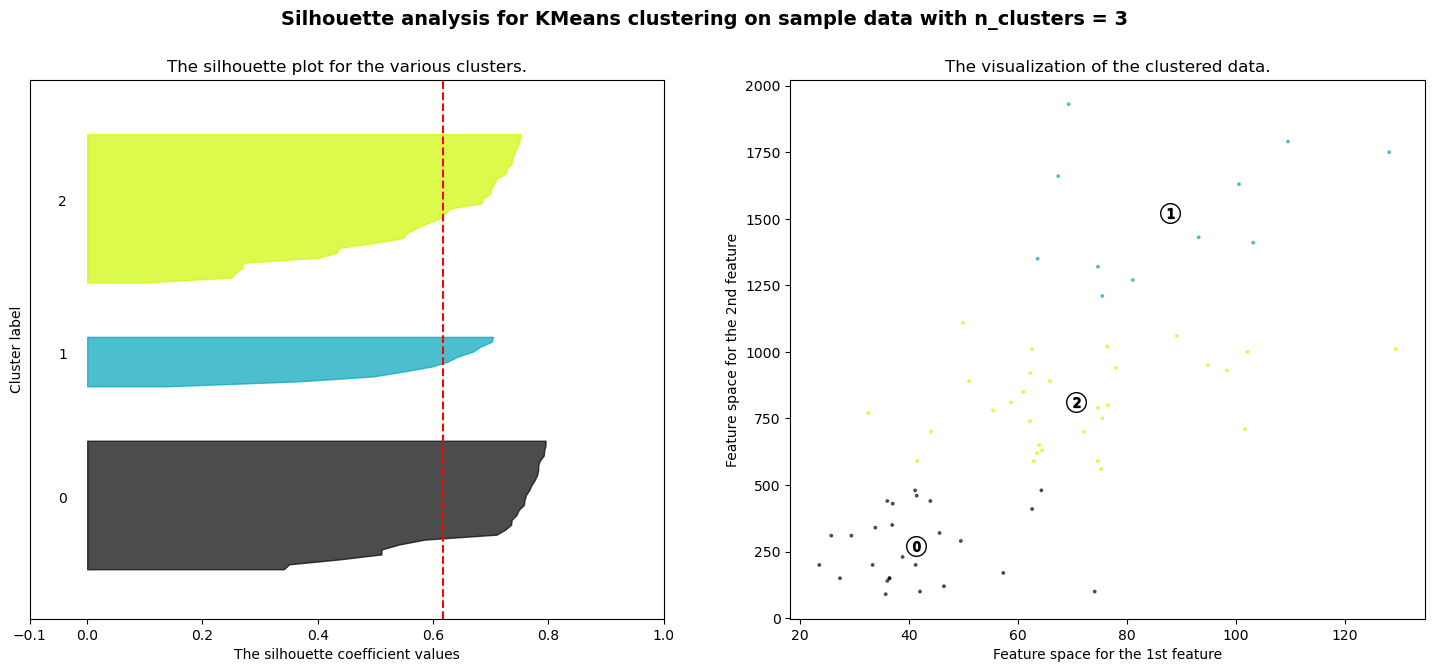

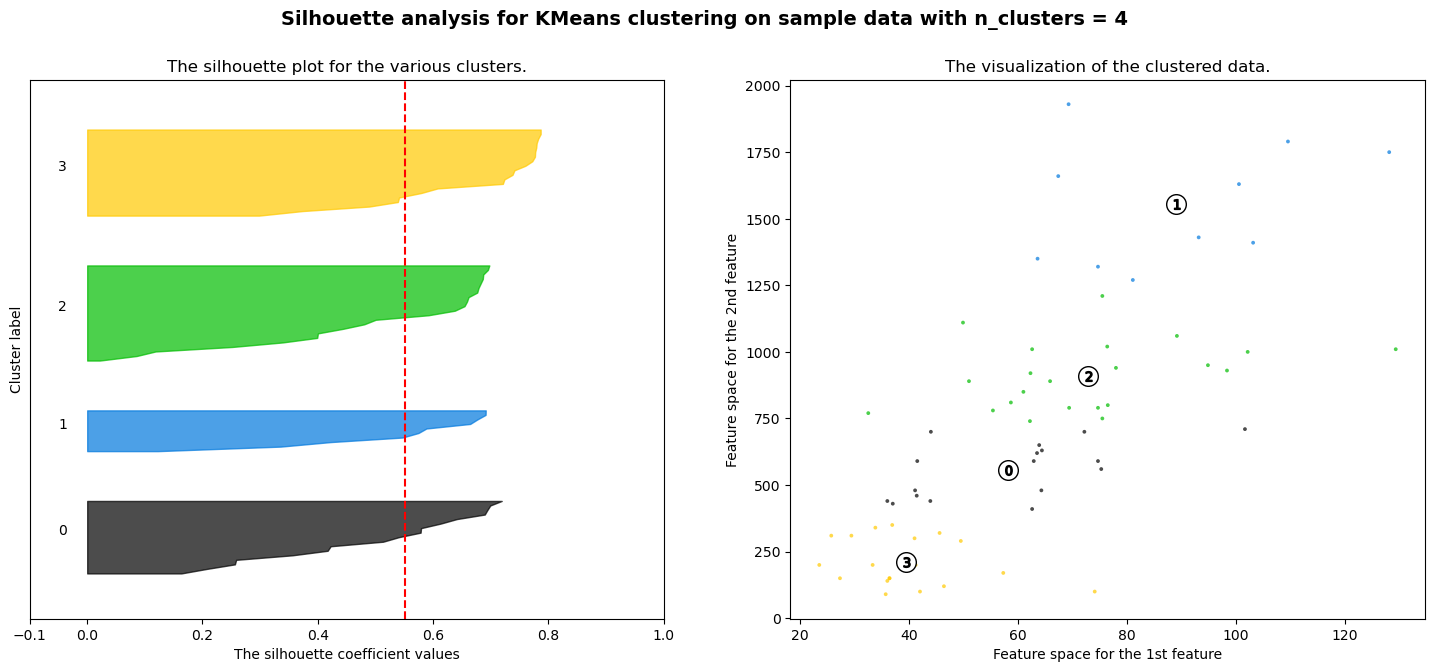

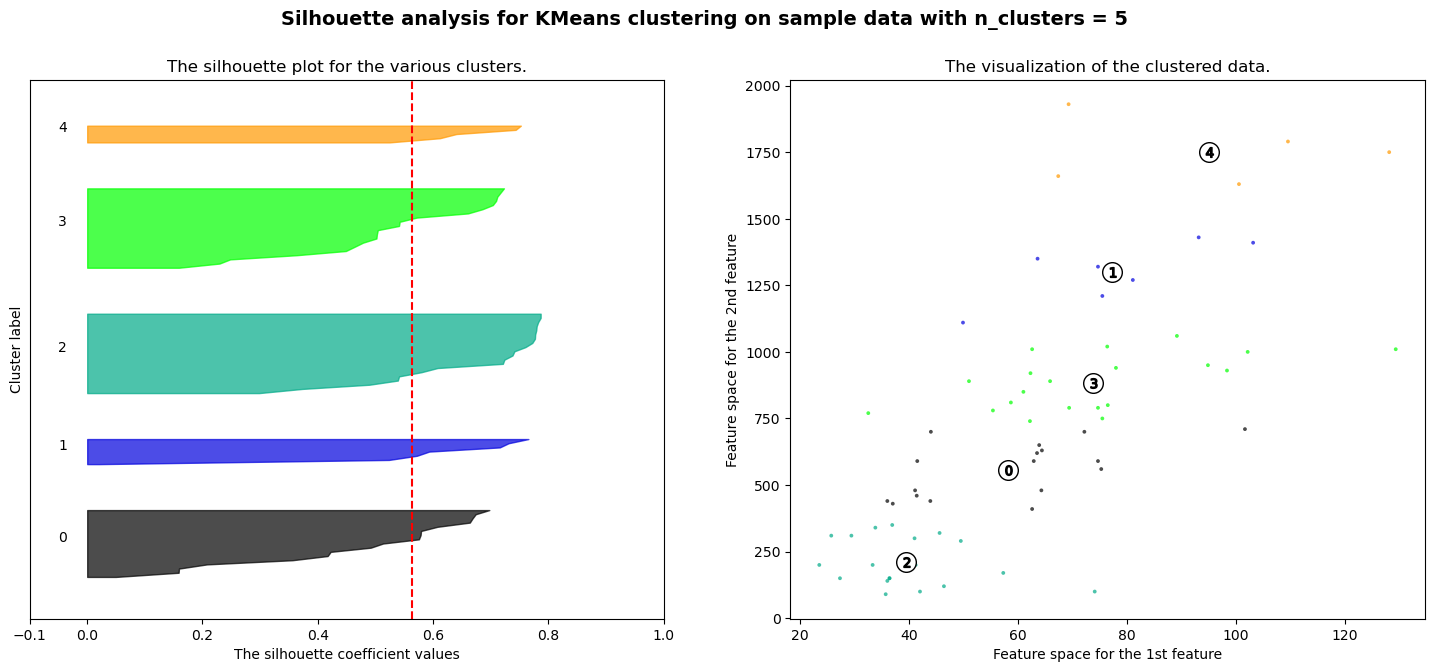

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import adjusted_rand_score as rand
from matplotlib import pyplot as plt
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#official example that showcases what we want 

X = df[['FoodIndex', 'Apt']].copy(deep=True)
range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    #calculate rand
    if n_clusters ==4:
        print("For n_clusters =", n_clusters,
              "The rand index score is :", rand(cluster_labels,df['region'].cat.codes))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['FoodIndex'], X['Apt'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

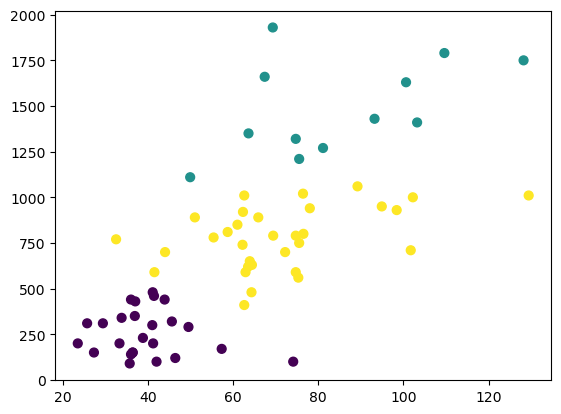

For n_clusters = 3 The average silhouette_score is : 0.5777821084528818


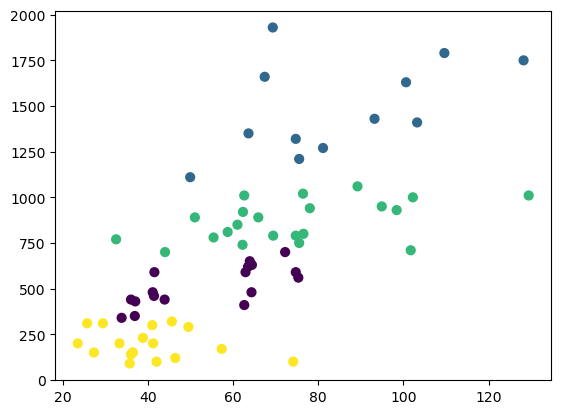

For n_clusters = 4 The average silhouette_score is : 0.5333804785557656
For n_clusters = 4 The rand index score is : 0.02466359835576011


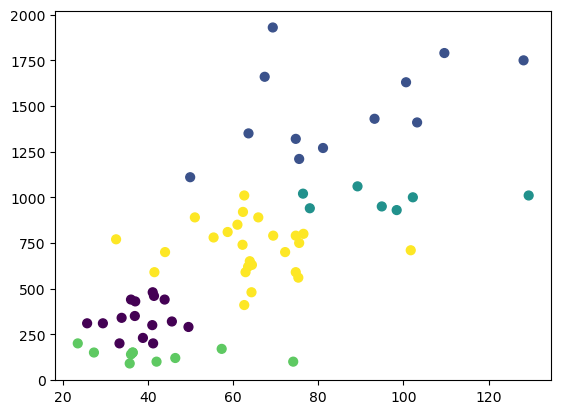

For n_clusters = 5 The average silhouette_score is : 0.36585978165088806


In [6]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import adjusted_rand_score as rand
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

X = df[['FoodIndex', 'Apt']].copy(deep=True)
range_n_clusters = [3, 4, 5]

for n_clusters in range_n_clusters:
    
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    plt.scatter(X['FoodIndex'], X['Apt'], c=cluster_labels, s=40, cmap='viridis')
    plt.show()

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    #calculate rand
    if n_clusters ==4:
        print("For n_clusters =", n_clusters,
              "The rand index score is :", rand(cluster_labels,df['region'].cat.codes))

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

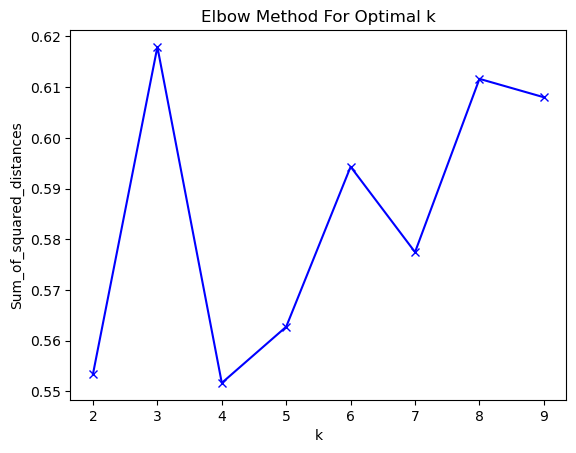

In [7]:
shs = []
K = range(2,)
for k in K:10
    km = KMeans(n_clusters=k)
    cluster_labels = km.fit_predict(X)
    shs.append(silhouette_score(X, cluster_labels))
    
plt.plot(K, shs, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [1]:
import pandas as pd

import numpy as np
def kl_divergence (p , q ) :
    return np . sum ( np . where ( p != 0 , p * np . log ( p / q ) , 0) )

data = [(0.4 , 0.3 , 0.3) , (0.4 , 0.35 , 0.25) , (0.5 , 0.3 , 0.2) ]
sales = pd . DataFrame ( data , columns = [ 'A ' , 'B ' , 'C '] , index = [ ' World - Wide , P ' , 'Netherlands Q1 ' , ' Italy Q2 '] )
sales . head ()
kldiv_ww_nl = kl_divergence ( sales . iloc [[0]]. values , sales . iloc [[1]]. values )
kldiv_ww_it = kl_divergence ( sales . iloc [[0]]. values , sales . iloc [[2]]. values )
print ( " KLDiv . Sales WW vs NL : " , kldiv_ww_nl )
print ( " KLDiv . Sales WW vs IT : " , kldiv_ww_it )

 KLDiv . Sales WW vs NL :  0.008451263090008904
 KLDiv . Sales WW vs IT :  0.032382111906765376


In [3]:
from scipy . stats import pearsonr , spearmanr
from sklearn . linear_model import LinearRegression
data = [(0.1 , 0.4 , 0.5 , 0.8 , 0.9) , (0.9 , 0.3 , 0.2 , 0.21 , 0.1) ]
sales = pd . DataFrame ( data , index = [ 'X ' , 'Y ' ])
print ( sales . head () )

print ( np . cov ( sales . iloc [[0]]. values , sales . iloc [[1]]. values ) )
print ( pearsonr ( sales . iloc [[0]]. values . flatten () , sales . iloc [[1]]. values . flatten () ) )
print ( spearmanr ( sales . iloc [[0]]. values . flatten () , sales . iloc [[1]]. values . flatten () ) )
X = [[0.1] ,[0.4] , [0.5] , [0.8] , [0.9]]
Y = [[0.9] , [0.3] , [0.2] , [0.21] , [0.1]]
reg = LinearRegression () . fit (X , Y )

print ( reg . coef_ )

      0    1    2     3    4
X   0.1  0.4  0.5  0.80  0.9
Y   0.9  0.3  0.2  0.21  0.1
[[ 0.103   -0.08885]
 [-0.08885  0.10232]]
PearsonRResult(statistic=-0.8654830244367913, pvalue=0.05801449914353504)
SignificanceResult(statistic=-0.8999999999999998, pvalue=0.03738607346849874)
[[-0.86262136]]


In [5]:
import statistics
header = [ np . array ([2015 ,2015 ,2015 ,2015 , 2016 ,2016 ,2016 ,2016 ,2017 ,2017 ,2017 ,2017]) , np .
array ([1 ,2 ,3 ,4 ,1 ,2 ,3 ,4 ,1 ,2 ,3 ,4]) ]
data = [0.3 , 0.4 , 0.3 , 0.35 , 0.55 , 0.6 , 0.5 , 0.6 , 0.4 , 0.5 , 0.45 , 0.4]
sales = pd . DataFrame ( columns = header , index = [ ' Quantinty ' ])
sales . iloc [0] = data

print ( statistics . mean ( sales . loc [ ' Quantinty ' ]) )
print ( statistics . mean ( sales . loc [ ' Quantinty ' ][2015]) )
print ( statistics . mean ( sales . loc [ ' Quantinty ' ][2016]) )
print ( statistics . mean ( sales . loc [ ' Quantinty ' ][2017]) )

0.44583333333333336
0.3375
0.5625
0.4375
